In [20]:
# 필요한 라이브러리 불러오기
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("필요한 라이브러리를 불러옵니다.")


필요한 라이브러리를 불러옵니다.


In [21]:

base_dir = '/Users/hangeonhui/Desktop/archive'
train_dir = os.path.join(base_dir, 'Training')
test_dir = os.path.join(base_dir, 'Testing')
categories = ['glioma', 'notumor']

# 클래스별 데이터 개수 확인
print("--- Training Data Distribution ---")
for category in categories:
    category_path = os.path.join(train_dir, category)
    print(f"{category}: {len(os.listdir(category_path))} images")

print("--- Testing Data Distribution ---")
for category in categories:
    category_path = os.path.join(test_dir, category)
    print(f"{category}: {len(os.listdir(category_path))} images")

print("학습 데이터와 테스트 데이터의 경로를 설정하고, 각 클래스(glioma, notumor)별 이미지 개수를 확인합니다.")


--- Training Data Distribution ---
glioma: 1321 images
notumor: 1321 images
--- Testing Data Distribution ---
glioma: 300 images
notumor: 405 images
학습 데이터와 테스트 데이터의 경로를 설정하고, 각 클래스(glioma, notumor)별 이미지 개수를 확인합니다.


In [22]:
# CNN 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

print("Conv2D와 MaxPooling2D를 사용해 특징을 추출합니다.")
print("Flatten으로 특징 맵을 1차원으로 변환하고, Dense 레이어를 사용해 분류를 수행합니다.")
print("손실 함수는 이진 분류 문제에 적합한 binary_crossentropy를 사용하며, 최적화 알고리즘으로 adam을 선택합니다.")


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 175232)            0         
                                                                 
 dense_8 (Dense)             (None, 64)                11214912  
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
____________

In [23]:
# 데이터 전처리
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# 클래스 매핑 확인
print("\n--- Class Indices ---")
print(test_generator.class_indices)

print("데이터를 0~1 사이의 범위로 정규화하여 모델 학습에 적합하게 만듭니다.")
print("ImageDataGenerator를 통해서 학습과 테스트 데이터를 생성합니다.")


Found 2642 images belonging to 2 classes.
Found 705 images belonging to 2 classes.

--- Class Indices ---
{'glioma': 0, 'notumor': 1}
데이터를 0~1 사이의 범위로 정규화하여 모델 학습에 적합하게 만듭니다.
ImageDataGenerator를 통해서 학습과 테스트 데이터를 생성합니다.


Epoch 1/3
83/83 [==============================] - 13s 149ms/step - loss: 0.4875 - accuracy: 0.8285
Epoch 2/3
83/83 [==============================] - 13s 151ms/step - loss: 0.0503 - accuracy: 0.9864
Epoch 3/3
83/83 [==============================] - 14s 167ms/step - loss: 0.0235 - accuracy: 0.9943


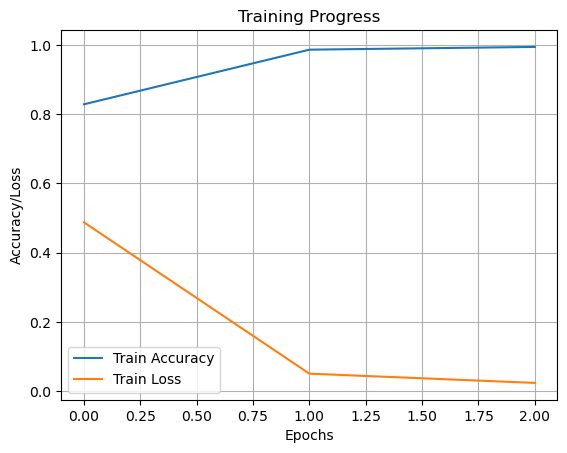

모델 학습을 완료하고, 학습 정확도와 손실 값을 시각화합니다.


In [24]:
# 모델 학습
history = model.fit(train_generator, epochs=3)

# 학습 결과 시각화
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.title('Training Progress')
plt.legend()
plt.grid()
plt.show()

print("모델 학습을 완료하고, 학습 정확도와 손실 값을 시각화합니다.")


In [26]:
# 클래스 매핑 확인
print("\n--- Class Indices ---")
print(test_generator.class_indices)



--- Class Indices ---
{'glioma': 0, 'notumor': 1}


1/1 [==============================] - 0s 54ms/step


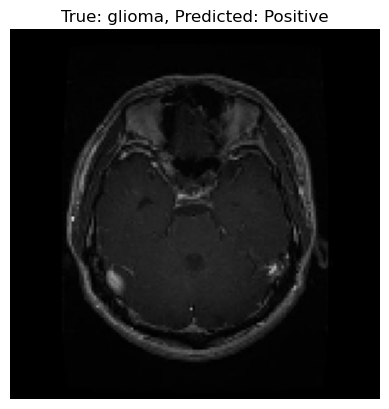

1/1 [==============================] - 0s 18ms/step


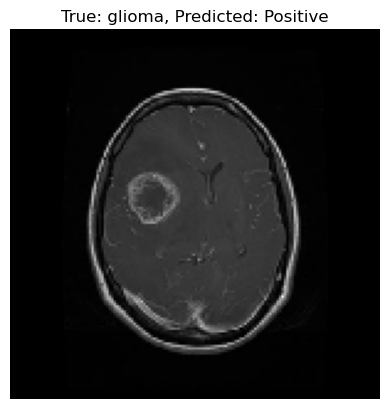

1/1 [==============================] - 0s 19ms/step


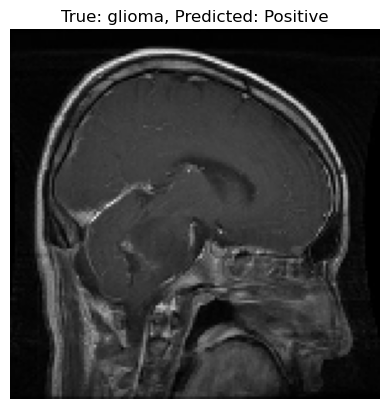

1/1 [==============================] - 0s 42ms/step


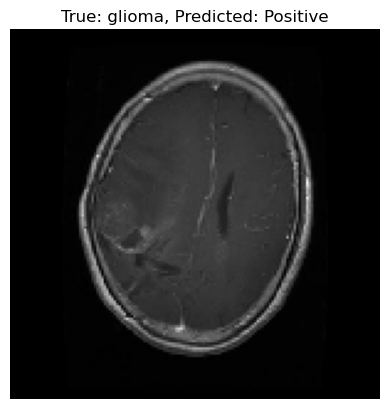

1/1 [==============================] - 0s 28ms/step


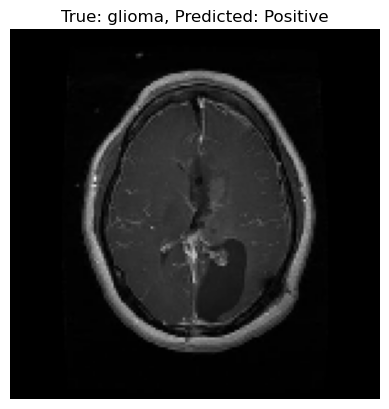

1/1 [==============================] - 0s 20ms/step


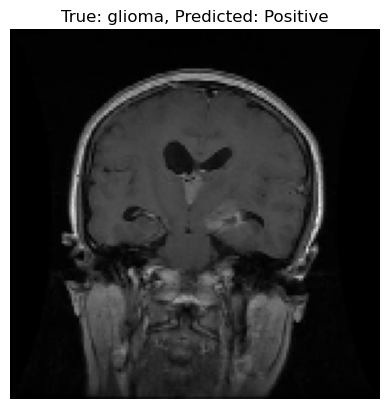

1/1 [==============================] - 0s 18ms/step


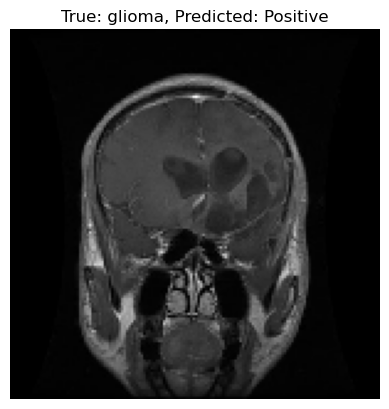

1/1 [==============================] - 0s 17ms/step


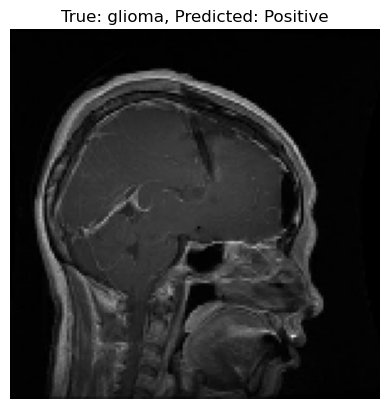

1/1 [==============================] - 0s 17ms/step


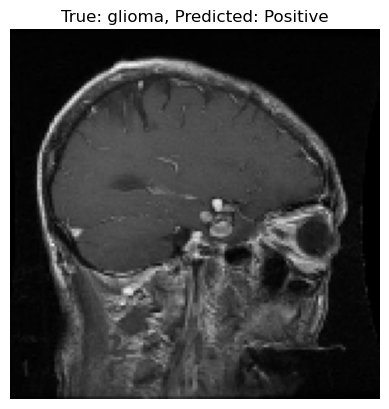

1/1 [==============================] - 0s 14ms/step


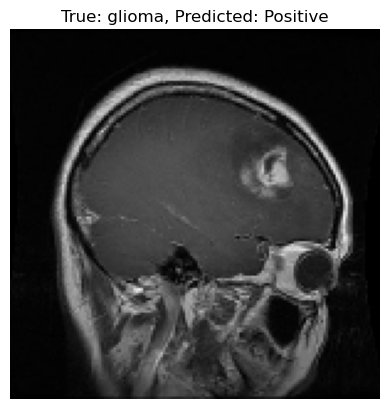

1/1 [==============================] - 0s 14ms/step


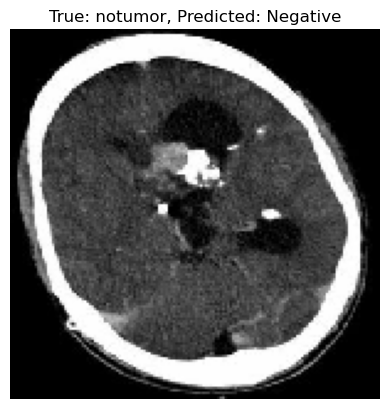

1/1 [==============================] - 0s 14ms/step


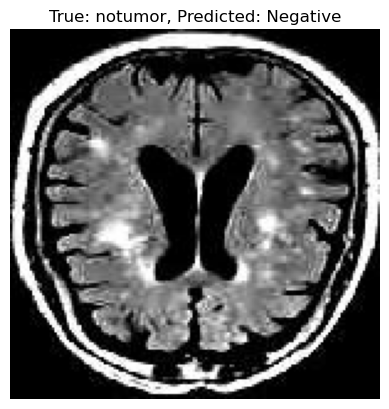

1/1 [==============================] - 0s 13ms/step


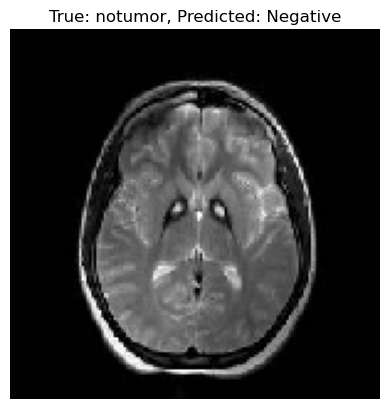

1/1 [==============================] - 0s 13ms/step


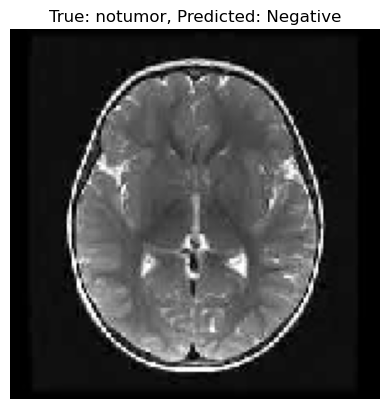

1/1 [==============================] - 0s 15ms/step


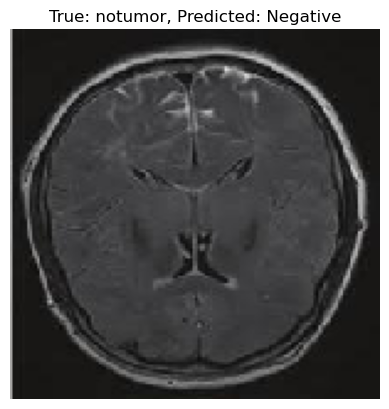

1/1 [==============================] - 0s 20ms/step


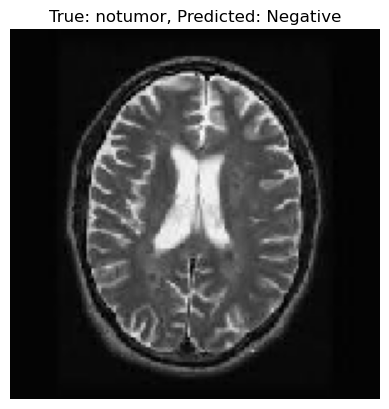

1/1 [==============================] - 0s 15ms/step


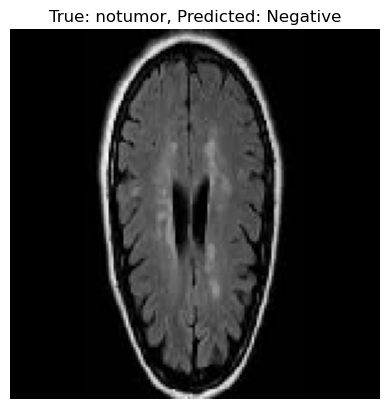

1/1 [==============================] - 0s 17ms/step


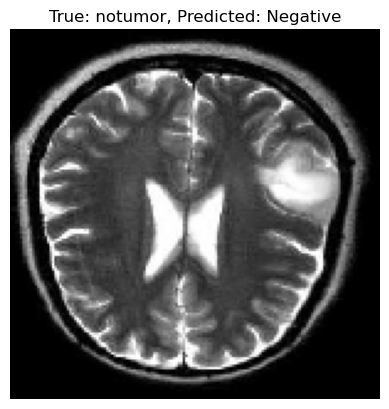

1/1 [==============================] - 0s 17ms/step


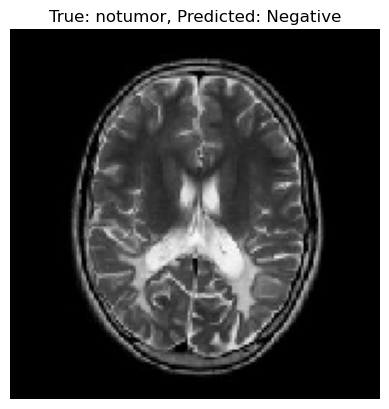

1/1 [==============================] - 0s 17ms/step


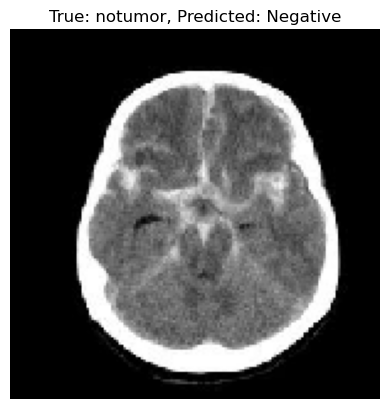

테스트 데이터에서 랜덤으로 선택한 20개의 이미지를 예측하고, 결과를 시각화합니다.


In [27]:
# 랜덤으로 20개 이미지 가져오기
random_images = []
for category in categories:
    category_path = os.path.join(test_dir, category)
    images = os.listdir(category_path)
    random_images += [(os.path.join(category_path, img), category) for img in random.sample(images, 10)]  # 카테고리당 10개

# 결과 저장 및 시각화
results = []

for image_path, true_label in random_images:
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0
    img_array = img_array.reshape(1, 150, 150, 3)

    prediction = model.predict(img_array)[0][0]

    # 클래스 매핑에 따라 조건 설정
    if test_generator.class_indices['glioma'] == 1:
        predicted_label = "Positive" if prediction > 0.5 else "Negative"
    else:
        predicted_label = "Negative" if prediction > 0.5 else "Positive"

    results.append((image_path, true_label, predicted_label))
    
    # 시각화
    plt.imshow(img)
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

print("테스트 데이터에서 랜덤으로 선택한 20개의 이미지를 예측하고, 결과를 시각화합니다.")


In [28]:
# 결과 출력
print("\n--- Prediction Results ---")
for idx, (image_path, true_label, predicted_label) in enumerate(results, start=1):
    print(f"{idx}. Image: {os.path.basename(image_path)} | True Label: {true_label} | Predicted Label: {predicted_label}")

# 학습된 모델 저장
model.save('glioma_notumor_model.h5')
print("Model saved successfully!")



--- Prediction Results ---
1. Image: Te-gl_0012.jpg | True Label: glioma | Predicted Label: Positive
2. Image: Te-gl_0014.jpg | True Label: glioma | Predicted Label: Positive
3. Image: Te-gl_0219.jpg | True Label: glioma | Predicted Label: Positive
4. Image: Te-gl_0035.jpg | True Label: glioma | Predicted Label: Positive
5. Image: Te-gl_0032.jpg | True Label: glioma | Predicted Label: Positive
6. Image: Te-gl_0239.jpg | True Label: glioma | Predicted Label: Positive
7. Image: Te-gl_0070.jpg | True Label: glioma | Predicted Label: Positive
8. Image: Te-gl_0180.jpg | True Label: glioma | Predicted Label: Positive
9. Image: Te-gl_0222.jpg | True Label: glioma | Predicted Label: Positive
10. Image: Te-gl_0198.jpg | True Label: glioma | Predicted Label: Positive
11. Image: Te-no_0092.jpg | True Label: notumor | Predicted Label: Negative
12. Image: Te-no_0265.jpg | True Label: notumor | Predicted Label: Negative
13. Image: Te-no_0077.jpg | True Label: notumor | Predicted Label: Negative
14.